# IMDB Top 250 Movies Dataset

- IMDB (Internet Movie Database) is one of the largest online databases for movies and television shows, providing comprehensive information about movies, including ratings and reviews from its vast user base. The IMDB ratings are widely used as a benchmark for the popularity and success of movies.

- This dataset contains the top 250 rated movies on IMDB as of 2021, providing a snapshot of the most popular and highly rated movies of recent times. By analyzing this dataset, one can gain insights into the movie industry, such as trends in movie ratings and popular genres.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objs as go

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# Loading data

In [2]:
folder = 'datasets'
for file in os.listdir(folder):
    print(file)

IMDB-Top-250-Movies.csv


In [3]:
df = pd.read_csv('datasets/IMDB-Top-250-Movies.csv')
df.head()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


# Data Statistics

In [4]:
df.shape

(250, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    object 
 7   tagline      250 non-null    object 
 8   budget       250 non-null    object 
 9   box_office   250 non-null    object 
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 25.5+ KB


### These are what the column names represent:

- `rank`: The rank of the movie based on its popularity or any other criteria.
- `name`: The name of the movie.
- `year`: The year in which the movie was released.
- `rating`: The rating of the movie on IMDb's scale of 1 to 10.
- `genre`: The category or type of movie, such as action, comedy, drama, etc.
- `certificate`: The rating given to the movie by the relevant certification board, which indicates the age appropriateness of the movie and may contain information about the content.
- `run_time`: The duration of the movie.
- `tagline`: The phrase or sentence used to promote the movie.
- `budget`: The estimated cost of making the movie.
- `box_office`: The amount of revenue generated by the movie at the box office.
- `casts`: The actors who appear in the movie.
- `directors`: The person who directed the movie.
- `writers`: The people who wrote the screenplay of the movie.

In [6]:
df.describe()

,rank,year,rating
count,250.000000,250.000000,250.000000
mean,125.500000,1986.360000,8.307200
std,72.312977,25.125356,0.229081
min,1.000000,1921.000000,8.000000
25%,63.250000,1966.250000,8.100000
50%,125.500000,1994.000000,8.200000
75%,187.750000,2006.000000,8.400000
max,250.000000,2022.000000,9.300000


In [7]:
df.isnull().sum()

rank           0
name           0
year           0
rating         0
genre          0
certificate    0
run_time       0
tagline        0
budget         0
box_office     0
casts          0
directors      0
writers        0
dtype: int64

In [8]:
# splits each cell with genres by separator
genres = df['genre'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('director')

# the list of genres with their respective counts
list_of_genres = genres.value_counts()
list_of_genres

director
Drama        177
Adventure     60
Crime         51
Action        50
Comedy        45
Mystery       31
Thriller      30
Biography     29
Romance       23
War           23
Animation     23
Sci-Fi        20
Fantasy       14
Family        13
History       10
Western        7
Horror         5
Sport          5
Music          4
Film-Noir      4
Musical        1
Name: count, dtype: int64

# Data Visualization

## Most popular movies across different genres

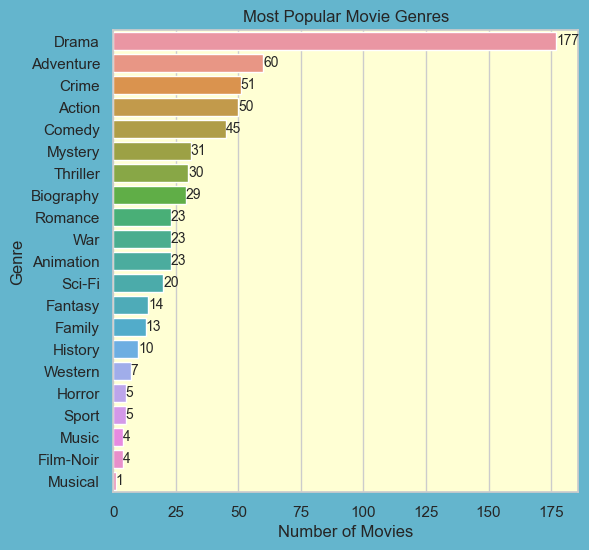

In [9]:
plt.figure(facecolor = "c", figsize = (6, 6))

ax = sns.barplot(y = genres.value_counts().index, x = genres.value_counts().values)

ax.set(xlabel='Number of Movies',ylabel='Genre', title='Most Popular Movie Genres')
ax.set_facecolor("xkcd:eggshell")
ax.bar_label(ax.containers[0], fontsize=10)

plt.show()

## Average Number of Movies over Time

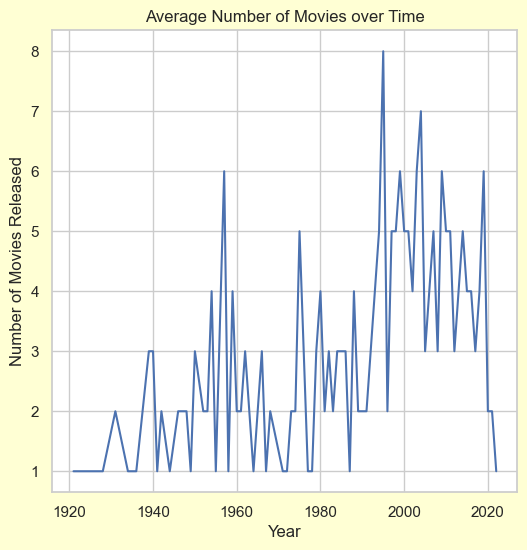

In [10]:
movies_year_counts = df.groupby('year')['name'].count()

plt.figure(facecolor = "xkcd:eggshell", figsize = (6, 6))
plt.plot(movies_year_counts.index, movies_year_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Average Number of Movies over Time')

plt.show()

## Average Rating over Time

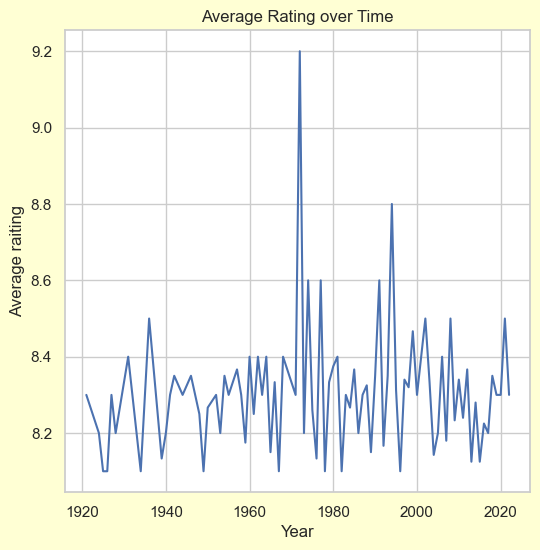

In [11]:
rating_year_counts = df.groupby('year')['rating'].mean()

plt.figure(facecolor = "xkcd:eggshell", figsize = (6, 6))
plt.plot(rating_year_counts.index, rating_year_counts.values)
plt.xlabel('Year')
plt.ylabel('Average raiting')
plt.title('Average Rating over Time')

plt.show()

## Top 10 Movies with the Longest Run Times

#### For now, the runtime format is not suitable for visualization:

In [12]:
df[['run_time']]

,run_time
0,2h 22m
1,2h 55m
2,2h 32m
3,3h 22m
4,1h 36m
...,...
245,2h 26m
246,2h 22m
247,1h 30m
248,3h 11m


#### Let's apply the function bellow and convert it to minutes:

In [13]:
def convert_to_mins(time_string):
    time_list = time_string.split()
    hours = 0
    minutes = 0
    for time_segment in time_list:
        if 'h' in time_segment:
            hours = int(time_segment[:-1])
        elif 'm' in time_segment:
            minutes = int(time_segment[:-1])
    total_minutes = hours * 60 + minutes
    return total_minutes

df['run_time'] = df['run_time'].apply(convert_to_mins)

In [14]:
df[['run_time']]

,run_time
0,142
1,175
2,152
3,202
4,96
...,...
245,146
246,142
247,90
248,191


In [15]:
top_10_budget = df.nlargest(10, 'run_time')
top_10_budget[['name', 'run_time']]

,name,run_time
158,Gone with the Wind,238
79,Once Upon a Time in America,229
96,Lawrence of Arabia,218
182,Ben-Hur,212
19,Seven Samurai,207
3,The Godfather Part II,202
6,The Lord of the Rings: The Return of the King,201
5,Schindler's List,195
248,Gandhi,191
26,The Green Mile,189


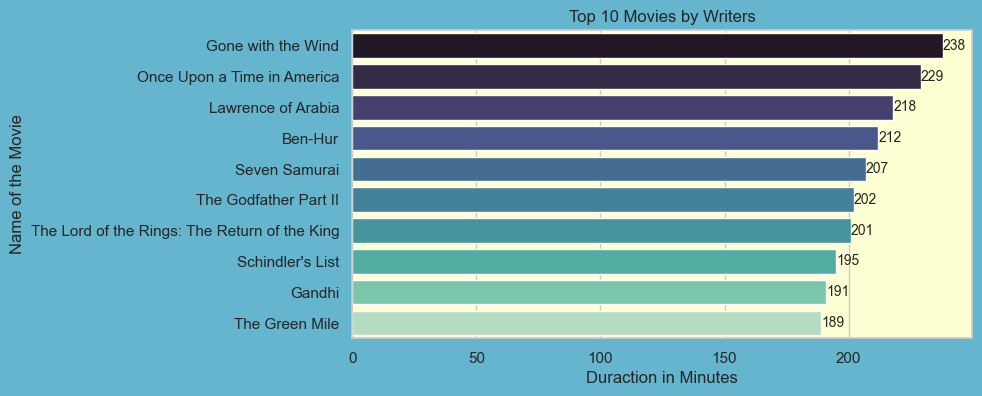

In [16]:
plt.figure(facecolor = 'c', figsize = (8, 4))
ax = sns.barplot(x='run_time', y='name', data=top_10_budget, palette='mako')
plt.title('Top 10 Movies by Writers')
plt.xlabel('Duraction in Minutes')
plt.ylabel('Name of the Movie')
ax.set_facecolor("xkcd:eggshell")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

## Top 10 Movies by Rating

In [17]:
top_10_rating = df.nlargest(10, 'rating')
top_10_rating[['name', 'rating']]

,name,rating
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
2,The Dark Knight,9.0
3,The Godfather Part II,9.0
4,12 Angry Men,9.0
5,Schindler's List,9.0
6,The Lord of the Rings: The Return of the King,9.0
7,Pulp Fiction,8.9
8,The Lord of the Rings: The Fellowship of the Ring,8.8
9,"The Good, the Bad and the Ugly",8.8


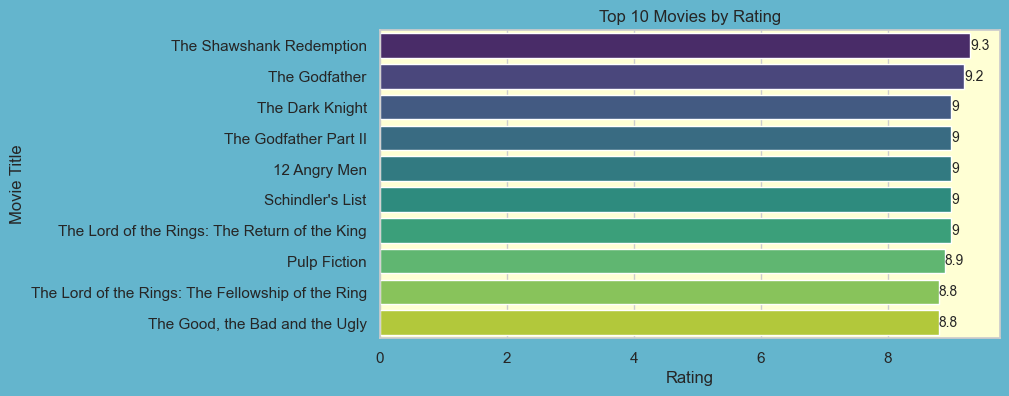

In [18]:
plt.figure(facecolor = 'c', figsize = (8, 4))
ax = sns.barplot(x='rating', y='name', data=top_10_rating, palette='viridis')
plt.title('Top 10 Movies by Rating')
plt.xlabel('Rating')
plt.ylabel('Movie Title')
ax.set_facecolor("xkcd:eggshell")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

## Top 10 Moviee by Writers:

In [19]:
top_10_writers = df.nlargest(10, 'rating')
top_10_writers[['writers', 'rating']]

,writers,rating
0,"Stephen King,Frank Darabont",9.3
1,"Mario Puzo,Francis Ford Coppola",9.2
2,"Jonathan Nolan,Christopher Nolan,David S. Goyer",9.0
3,"Francis Ford Coppola,Mario Puzo",9.0
4,Reginald Rose,9.0
5,"Thomas Keneally,Steven Zaillian",9.0
6,"J.R.R. Tolkien,Fran Walsh,Philippa Boyens",9.0
7,"Quentin Tarantino,Roger Avary",8.9
8,"J.R.R. Tolkien,Fran Walsh,Philippa Boyens",8.8
9,"Luciano Vincenzoni,Sergio Leone,Agenore Incrocci",8.8


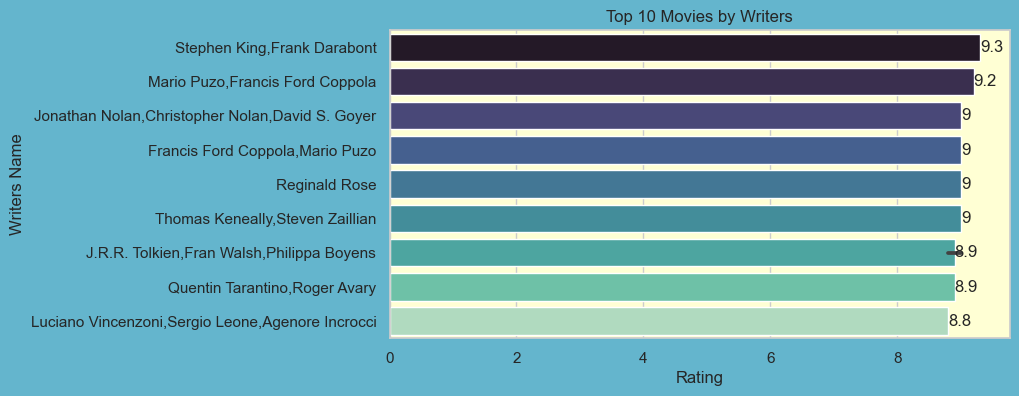

In [20]:
plt.figure(facecolor = 'c', figsize = (8, 4))
ax = sns.barplot(x='rating', y='writers', data=top_10_writers, palette='mako')
plt.title('Top 10 Movies by Writers')
plt.xlabel('Rating')
plt.ylabel('Writers Name')
ax.set_facecolor("xkcd:eggshell")
ax.bar_label(ax.containers[0], fontsize=12)
plt.show()

## Directors with the highest number of movies

In [21]:
df_directors = df['directors'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('Director Name')
df_top_directors = df_directors.value_counts().nlargest(10)
df_top_directors

Director Name
Christopher Nolan    7
Steven Spielberg     7
Akira Kurosawa       7
Martin Scorsese      7
Stanley Kubrick      7
Alfred Hitchcock     6
Charles Chaplin      5
Quentin Tarantino    5
Billy Wilder         5
Hayao Miyazaki       4
Name: count, dtype: int64

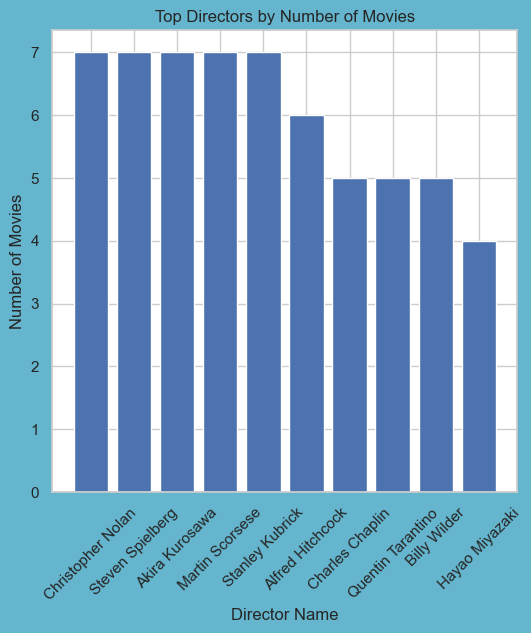

In [34]:
plt.figure(figsize=(6, 6), facecolor = "c")
plt.bar(df_top_directors.index, df_top_directors.values)
plt.xlabel('Director Name')
plt.ylabel('Number of Movies')
plt.title('Top Directors by Number of Movies')
plt.xticks(rotation=45)  # Rotates x-axis labels by 90 degrees
plt.show()


## Oldest movies on the charts

In [33]:
oldest_movies=df.sort_values(by='year')[0:15]

fig = go.Figure(data=[go.Table(header=dict(values=['Movie Name', 'Release Year'],fill_color='cyan'),
                 cells=dict(values=[oldest_movies['name'],oldest_movies['year']]))
                     ])
fig.show()

## Latest movies on the chart

In [24]:
oldest_movies=df.sort_values(by='year', ascending=False)[0:15]

fig = go.Figure(data=[go.Table(header=dict(values=['Movie Name', 'Release Year'],fill_color='cyan'),
                 cells=dict(values=[oldest_movies['name'],oldest_movies['year']]))
                     ])
fig.show()